In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_json('news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json', lines=True)

In [3]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
data = df.headline

In [5]:
data.head()

0    former versace store clerk sues over secret 'b...
1    the 'roseanne' revival catches up to our thorn...
2    mom starting to fear son's web series closest ...
3    boehner just wants wife to listen, not come up...
4    j.k. rowling wishes snape happy birthday in th...
Name: headline, dtype: object

In [6]:
def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token not in stopwords_list]
    return stopwords_removed    

In [7]:
import nltk
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
import string
stopwords_list += list(string.punctuation)

In [8]:
stopwords_list += ["''", '""', '...', '``']

In [9]:
processed_data = list(map(process_article, data))

In [10]:
processed_data[0]

['former',
 'versace',
 'store',
 'clerk',
 'sues',
 'secret',
 "'black",
 'code',
 'minority',
 'shoppers']

In [11]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

29129

In [12]:
articles_concat = []
for article in processed_data:
    articles_concat += article

In [13]:
from nltk import word_tokenize, FreqDist

articles_freqdist = FreqDist(articles_concat)
articles_freqdist.most_common(200)

[("'s", 4804),
 ('trump', 1636),
 ('new', 1499),
 ('man', 1373),
 ("n't", 1055),
 ('report', 514),
 ('one', 503),
 ('area', 485),
 ('woman', 476),
 ('donald', 470),
 ('says', 453),
 ('day', 434),
 ('obama', 415),
 ('time', 403),
 ('first', 400),
 ('like', 396),
 ('women', 394),
 ('people', 390),
 ('get', 385),
 ('u.s.', 382),
 ('world', 370),
 ('nation', 360),
 ('house', 346),
 ('life', 344),
 ('clinton', 334),
 ('still', 327),
 ('make', 324),
 ('could', 309),
 ('white', 308),
 ('back', 307),
 ('family', 277),
 ('americans', 266),
 ('gop', 261),
 ('way', 257),
 ('would', 256),
 ('year', 249),
 ('study', 247),
 ('5', 245),
 ('years', 242),
 ('black', 241),
 ('bill', 239),
 ('president', 233),
 ('police', 233),
 ('best', 230),
 ('watch', 230),
 ('school', 229),
 ('show', 229),
 ('america', 228),
 ('really', 227),
 ('know', 223),
 ('ca', 221),
 ('home', 217),
 ('mom', 216),
 ('things', 216),
 ('finds', 215),
 ('state', 214),
 ('death', 211),
 ('video', 210),
 ('hillary', 208),
 ('health',

In [14]:
is_sarcastic = df[df.is_sarcastic == 1]
not_sarcastic = df[df.is_sarcastic == 0]

In [15]:
is_sarcastic.reset_index(drop=True, inplace=True)
not_sarcastic.reset_index(drop=True, inplace=True)

In [16]:
sarcastic_headlines = []

for rows in range(0, is_sarcastic.shape[0]):
    head_txt = is_sarcastic.headline[rows]
    head_txt = head_txt.split(" ")
    sarcastic_headlines.append(head_txt)


In [17]:
import itertools
sarcastic_list = list(itertools.chain(*sarcastic_headlines))


In [18]:
not_sarcastic_headlines = []
for rows in range(0, not_sarcastic.shape[0]):
    head_txt = not_sarcastic.headline[rows]
    head_txt = head_txt.split(" ")
    not_sarcastic_headlines.append(head_txt)

In [19]:
not_sarcastic_list = list(itertools.chain(*not_sarcastic_headlines))

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
sarcastic_list_repo = [word for word in sarcastic_list if word.lower() not in stopwords]
not_sarcastic_list_repo = [word for word in not_sarcastic_list if word.lower() not in stopwords]

print("Length of original Sarcasm list: {0} words\n"
      "Length of Sarcasm list after stopwords removal: {1} words"
      .format(len(sarcastic_list), len(sarcastic_list_repo)))

print("=="*46)

print("Length of original Non-Sarcasm list: {0} words\n"
      "Length of Non-Sarcasm list after stopwords removal: {1} words"
      .format(len(not_sarcastic_list), len(not_sarcastic_list_repo)))

Length of original Sarcasm list: 115898 words
Length of Sarcasm list after stopwords removal: 87458 words
Length of original Non-Sarcasm list: 147128 words
Length of Non-Sarcasm list after stopwords removal: 103525 words


In [21]:
from collections import Counter
sarcasm_counter = Counter(sarcastic_list_repo)
non_sarcasm_counter = Counter(not_sarcastic_list_repo)

In [22]:
sarcasm_counter_df = pd.DataFrame(list(sarcasm_counter.items()), columns = ['Words', 'Freq'])
sarcasm_counter_df = sarcasm_counter_df.sort_values(by=['Freq'], ascending=False)
non_sarcasm_counter_df = pd.DataFrame(list(non_sarcasm_counter.items()), columns = ['Words', 'Freq'])
non_sarcasm_counter_df = non_sarcasm_counter_df.sort_values(by=['Freq'], ascending=False)

In [23]:
sarcasm_counter_df_50 = sarcasm_counter_df.head(50)
non_sarcasm_counter_df_50 = non_sarcasm_counter_df.head(50)
sarcasm_counter_df_30 = sarcasm_counter_df.head(30)
non_sarcasm_counter_df_30 = non_sarcasm_counter_df.head(30)

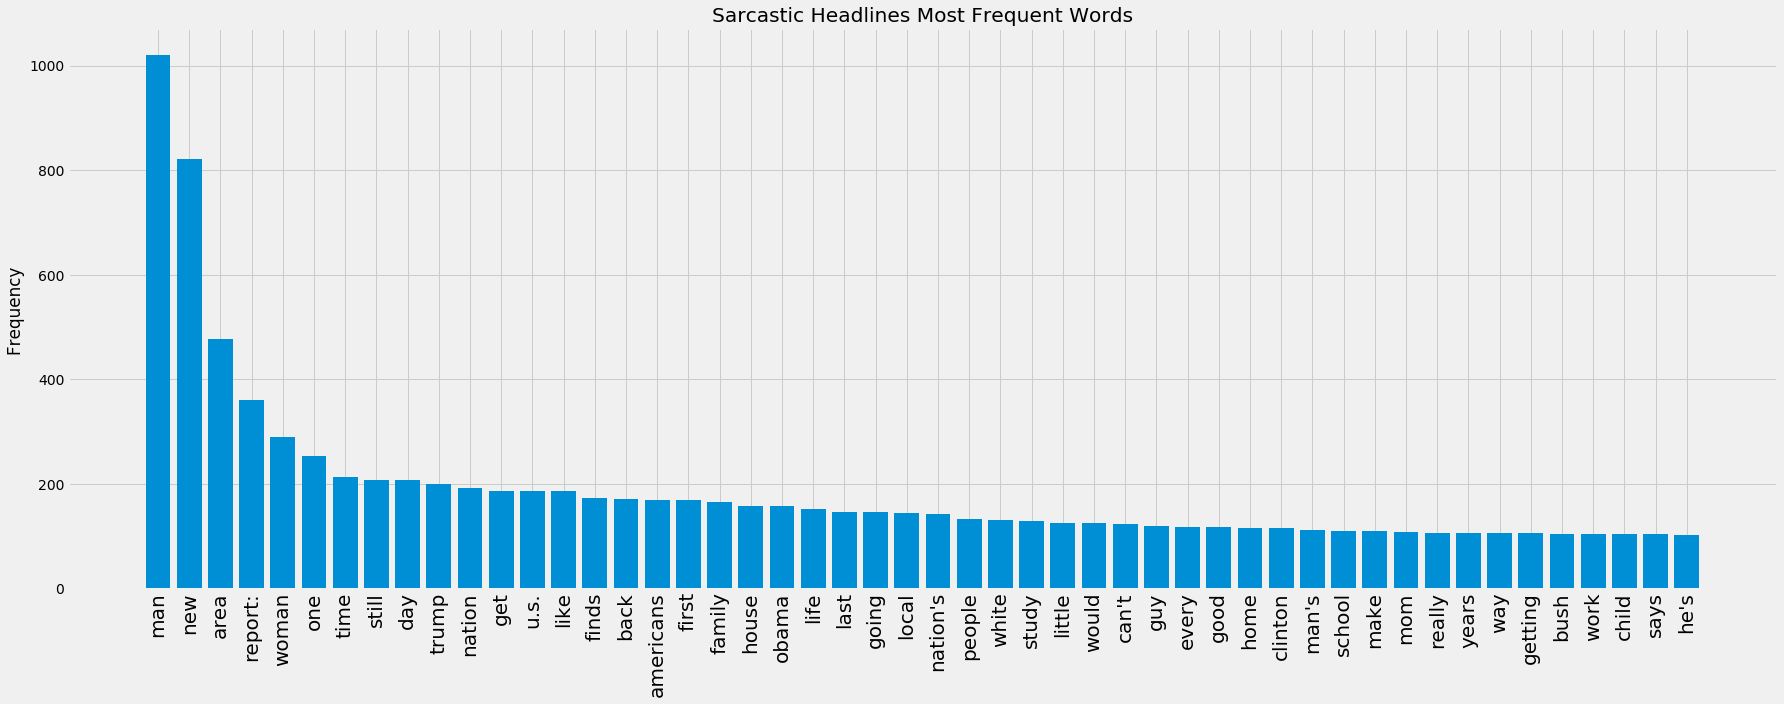

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(25, 10))

sarcasm_plot = ax.bar(sarcasm_counter_df_50['Words'], sarcasm_counter_df_50['Freq'])
ax.set_ylabel('Frequency ')
ax.set_title('Sarcastic Headlines Most Frequent Words')

plt.xticks(rotation='vertical',fontsize=20)

fig.tight_layout()

plt.show()

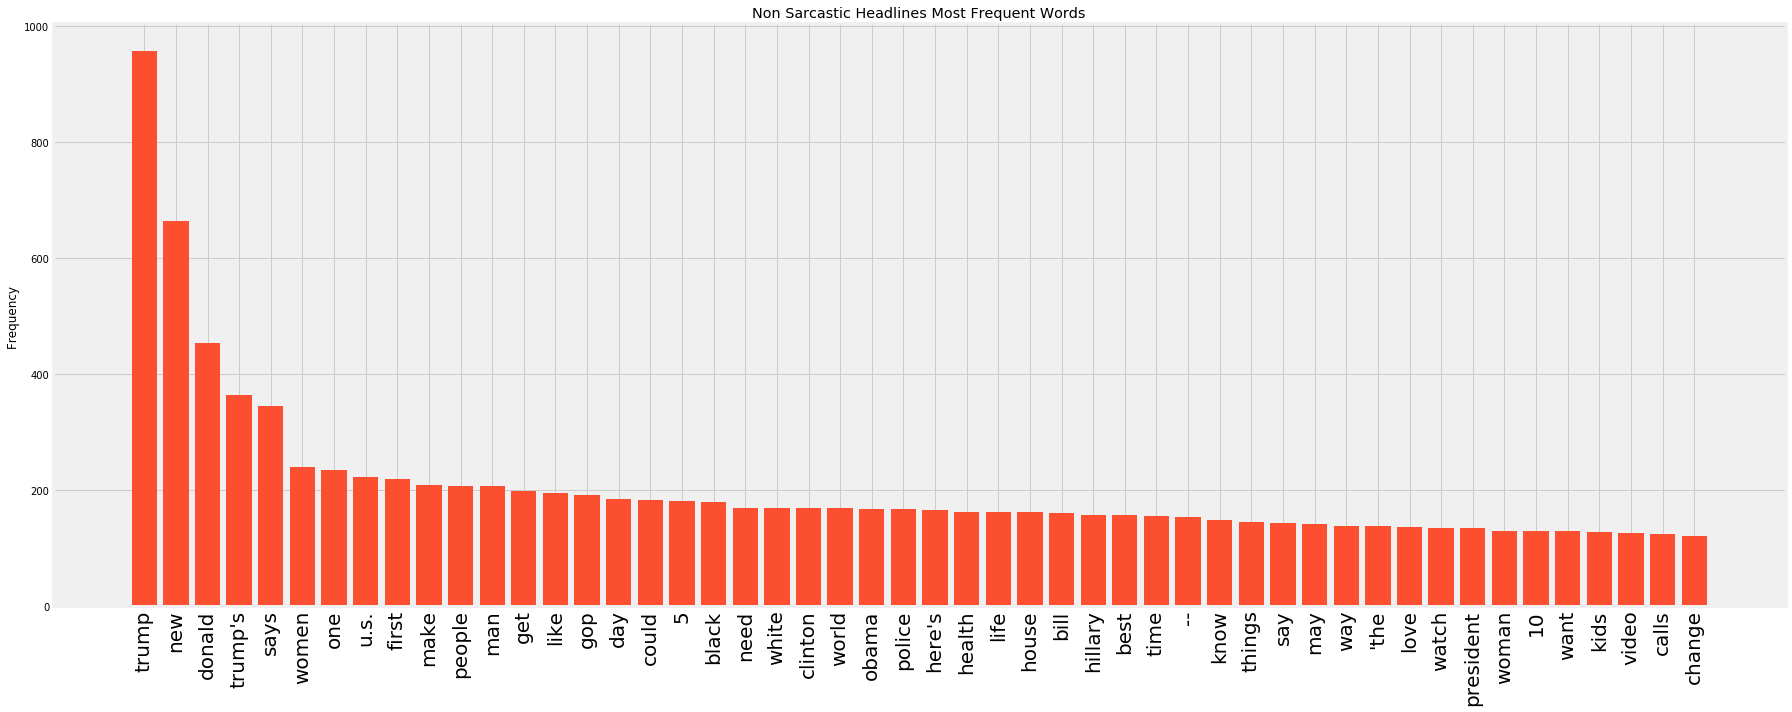

In [25]:
fig, ax = plt.subplots(figsize=(25, 10))

sarcasm_plot = ax.bar(non_sarcasm_counter_df_50['Words'], non_sarcasm_counter_df_50['Freq'], color='#fc4f30')
ax.set_ylabel('Frequency ')
ax.set_title('Non Sarcastic Headlines')

ax.set_ylabel('Frequency ')
ax.set_title('Non Sarcastic Headlines Most Frequent Words')

plt.xticks(rotation='vertical',fontsize=20)

fig.tight_layout()

plt.show()

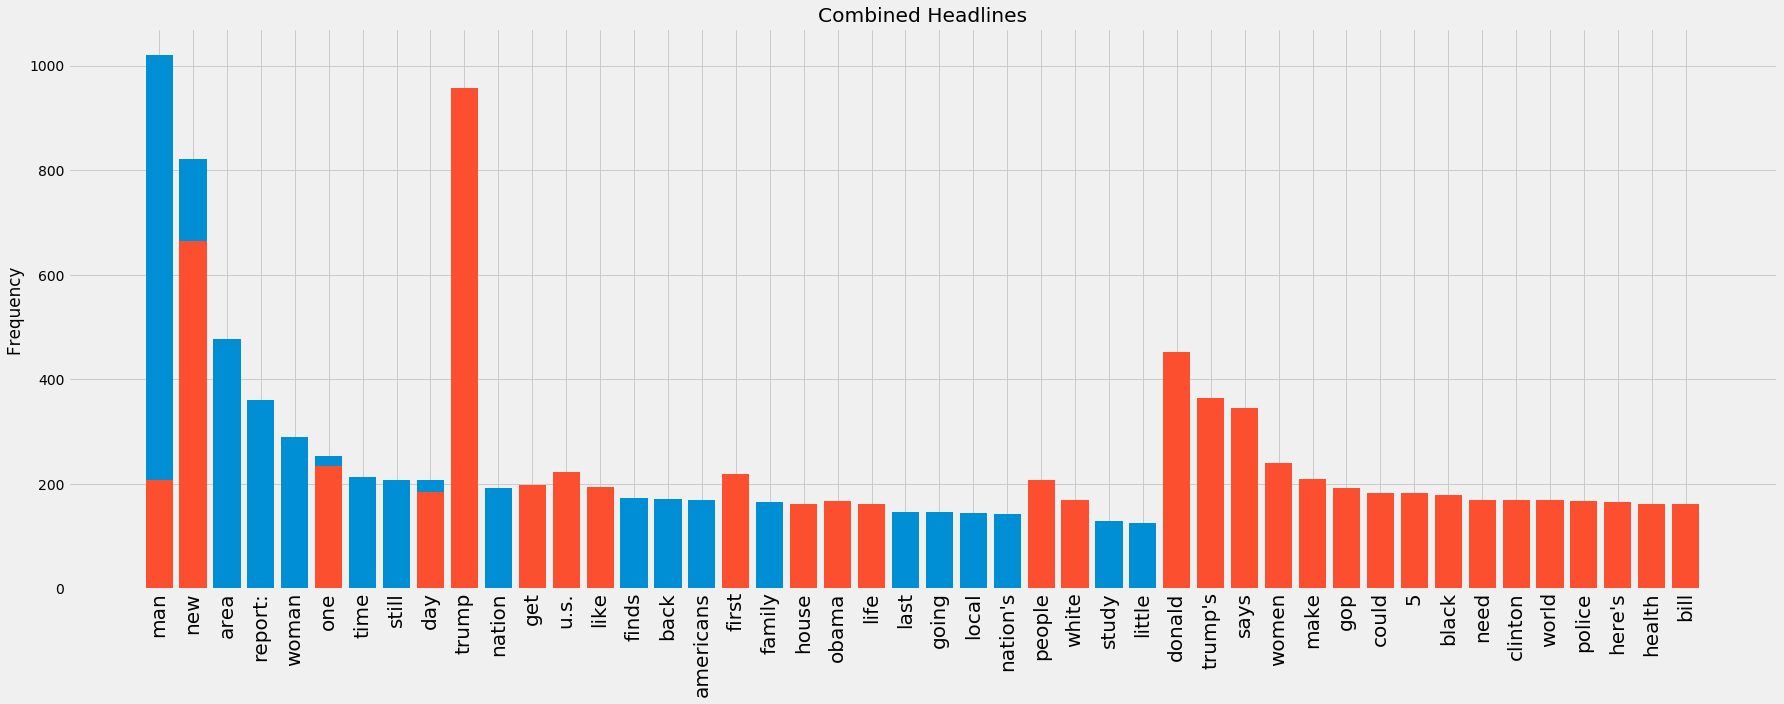

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(25, 10))

sarcasm_plot = ax.bar(sarcasm_counter_df_30['Words'], sarcasm_counter_df_30['Freq'])
ax.set_ylabel('Frequency ')
ax.set_title('Sarcastic Headlines')

sarcasm_plot = ax.bar(non_sarcasm_counter_df_30['Words'], non_sarcasm_counter_df_30['Freq'])
ax.set_ylabel('Frequency ')
ax.set_title('Combined Headlines')



plt.xticks(rotation='vertical',fontsize=20)

fig.tight_layout()

plt.show()

In [27]:
is_sarcastic.headline[0]

"mom starting to fear son's web series closest thing she will have to grandchild"

In [28]:
text = is_sarcastic.headline[0]

In [29]:
from wordcloud import WordCloud

In [30]:
text = " ".join(review for review in is_sarcastic.headline)

In [38]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [39]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

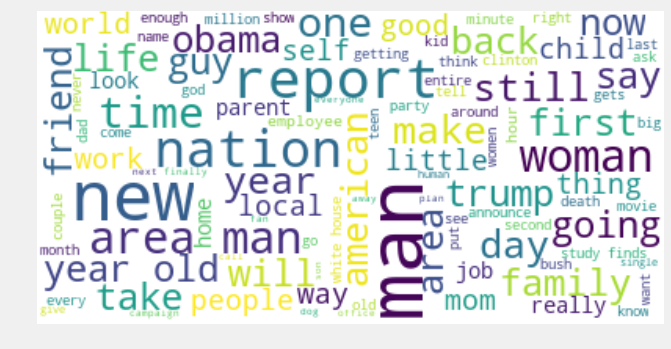

In [40]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
# plt.figure(figsize=(55,50))
plt.axis("off")
plt.show()

In [49]:
text = " ".join(review for review in not_sarcastic.headline)

In [44]:
wordcloud = WordCloud().generate(text)

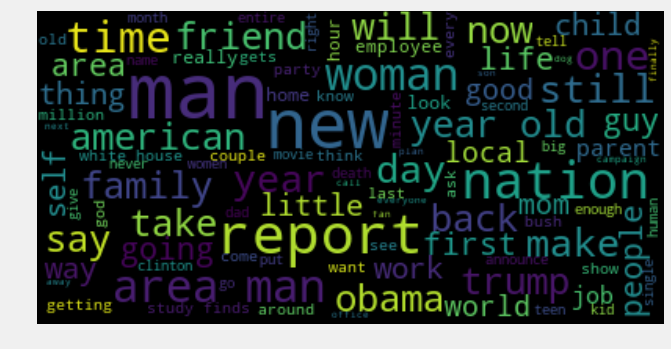

In [37]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()